# <center>KNN + SVM + Naive Bayes

### Questions

* Q1.	Compute and plot those feature which are related to each other?
* Q2.	What are the optimum number of principal components in PCA? <font color="red">(Yet to cover)</font>
* Q3.	Build a KNN classifier considering optimal number of principal components and value of K and state its score.<font color="red">(Yet to cover)</font>
* Q4.	Build a SVM Classifier and tune the hyperparameters to get the optimum model.
* Q5.	Build a Naive Bayes Classifier and comment about its accuracy.
* Q6.	Compare all of the models and justify your choice about the optimum model.

### Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __Step 6: Implementing the results__

### Step 1: Importing the Relevant Libraries

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

### Step 2: Data Inspection

In [2]:
os.chdir(r"D:\Imarticus\Exam_Assesment_section\KNN_SVM_NAIVEBAYES_PCA\KNN + SVM + Naive Bayes + PCA")
df=pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.shape

(178, 14)

In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### Step 3: Data Preparation & Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

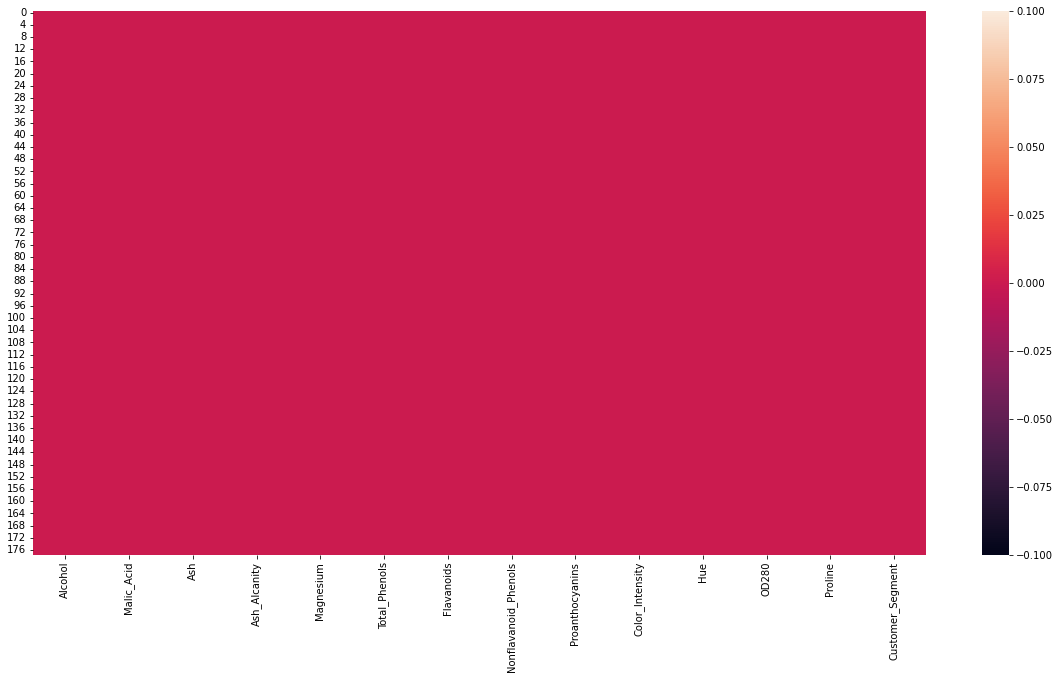

In [53]:
# plot of missing value attributes
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

#### As we can see above there is no null values in the data.

In [7]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

### Step 4: Exploratory Data Analysis

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

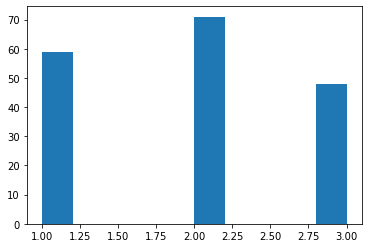

In [8]:
#Visualizing Target variable
plt.hist(df['Customer_Segment'])

In [9]:
# Check correlation
df.corr() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


#### Plotting Heatmap

<AxesSubplot:>

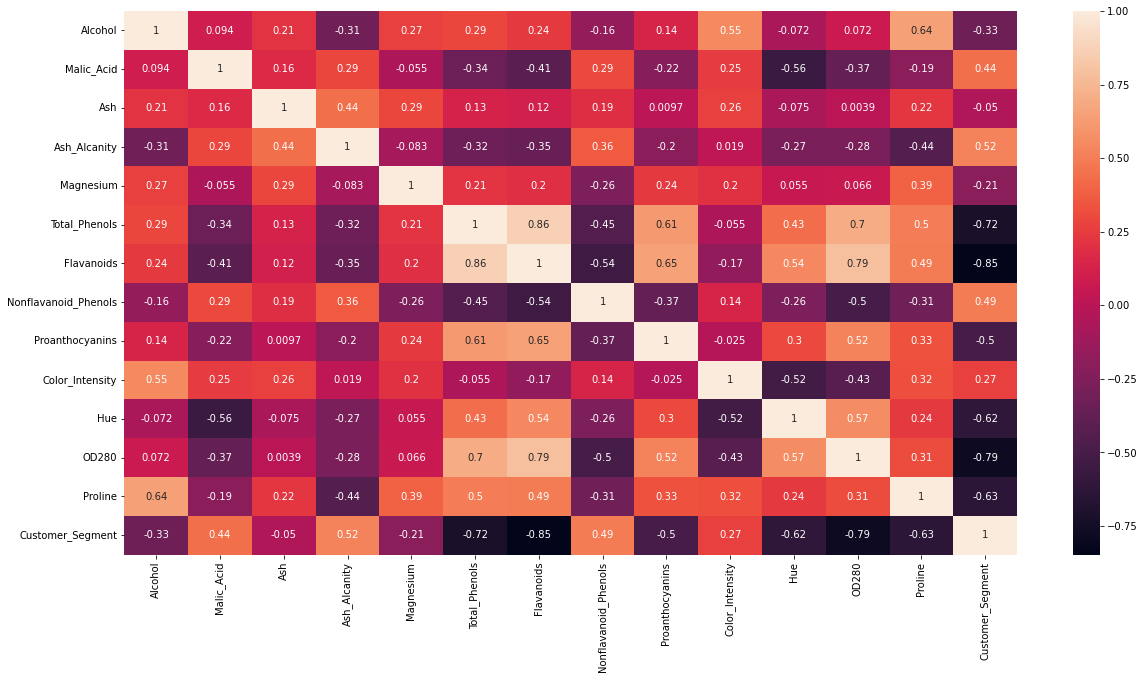

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

### <font color='blue'>Top 50% Correlation attributes with target variables</font>

In [59]:
corr=df.corr()
(corr['Customer_Segment']>0.05)

Alcohol                 False
Malic_Acid               True
Ash                     False
Ash_Alcanity             True
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols     True
Proanthocyanins         False
Color_Intensity          True
Hue                     False
OD280                   False
Proline                 False
Customer_Segment         True
Name: Customer_Segment, dtype: bool

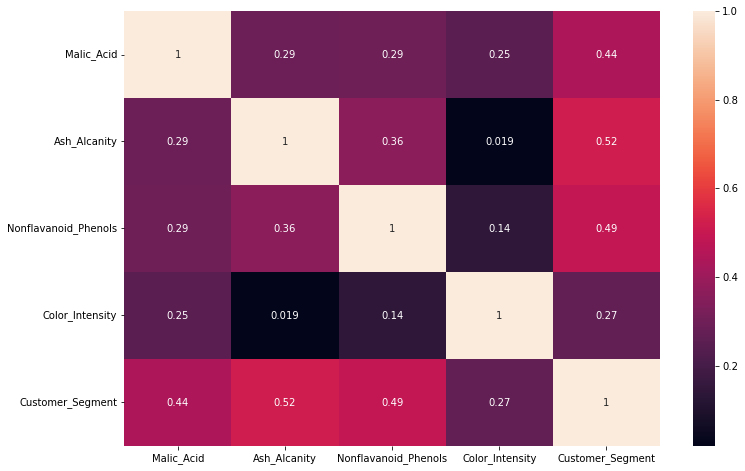

In [61]:
top_feature=corr.index[abs(corr['Customer_Segment']>0.05)]
plt.subplots(figsize=[12,8])
top_corr=df[top_feature].corr()
sns.heatmap(top_corr,annot=True)
plt.show()

#### Recursive Feature Selection 

In [11]:
dt=DecisionTreeClassifier()

In [12]:
rfe=RFE(dt,7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [13]:
cr_x = df.iloc[: , 0:13]
cr_y = df.iloc[:, -1]

In [14]:
cr_x.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [15]:
cr_y.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [16]:
rfe.fit(cr_x,cr_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

In [17]:
rfe.support_

array([ True, False, False, False,  True, False,  True, False, False,
        True,  True,  True,  True])

In [18]:
feature_imp_rfe= pd.DataFrame({"Features":cr_x.columns,"Important":rfe.support_ })

In [19]:
feature_imp_rfe.sort_values("Important",ascending=False)

,Features,Important
0,Alcohol,True
4,Magnesium,True
6,Flavanoids,True
9,Color_Intensity,True
10,Hue,True
11,OD280,True
12,Proline,True
1,Malic_Acid,False
2,Ash,False
3,Ash_Alcanity,False


* From Above Recursive Feature Selection we come to know the important feature in the given data ,now we will pair plot the important feature to get the more details  

### Pairplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


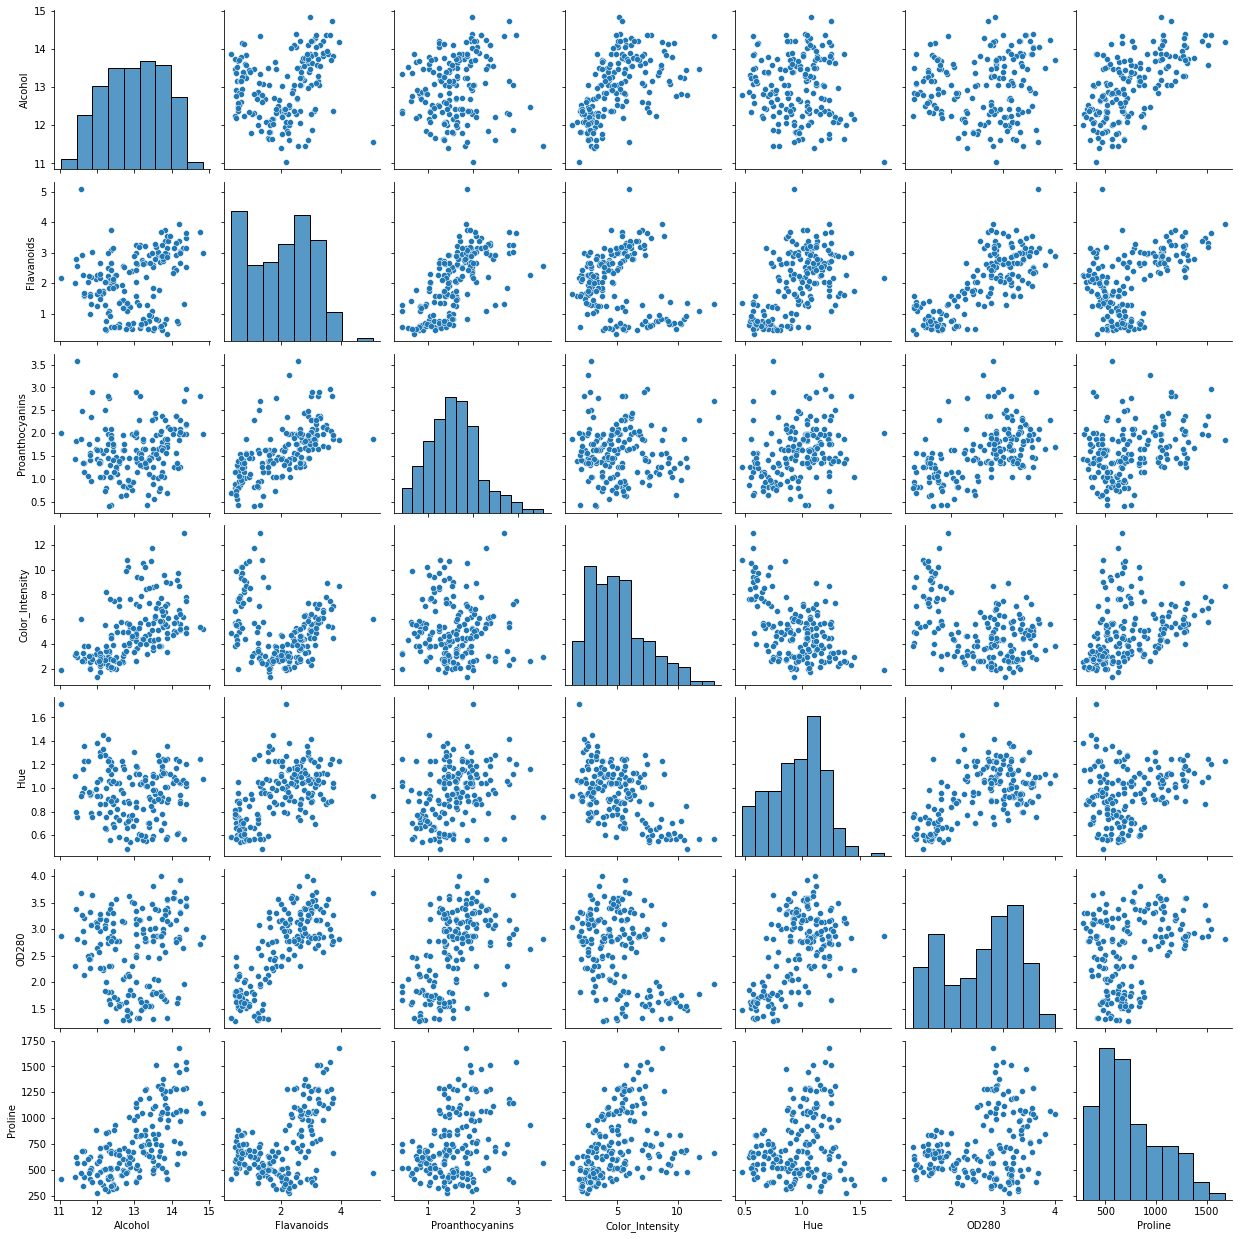

In [20]:
imp_features = ['Alcohol', 'Flavanoids', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
sns.pairplot(df[imp_features],palette='viridis', size=2.5)

[0.13367669 0.04229459 0.02384416 0.04057612 0.03679431 0.05493822
 0.13618201 0.02072947 0.03805248 0.11654463 0.09028866 0.11417691
 0.15190176]


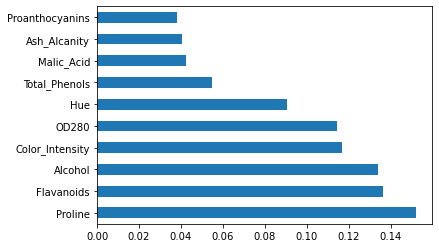

In [21]:
model = ExtraTreesClassifier()
model.fit(cr_x,cr_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cr_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Below Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [22]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(cr_x,cr_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(cr_x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
12          Proline  16540.067145
9   Color_Intensity    109.016647
6        Flavanoids     63.334308
4         Magnesium     45.026381
3      Ash_Alcanity     29.383695
1        Malic_Acid     28.068605
11            OD280     23.389883
5     Total_Phenols     15.623076
8   Proanthocyanins      9.368283
0           Alcohol      5.445499


#### Statistical tests can be used to select those features that have the strongest relationship with the output variable.
#### The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

### Step 5: Building Model

#### Train & Test Split

In [23]:
x=df.drop(['Customer_Segment'],axis=1)
y=df['Customer_Segment']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

### Linear Regression

In [25]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
print(lm.intercept_) # To print the intercept

4.791654493619682


In [27]:
coeff_df=pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient']) # To see the coefficient

In [28]:
y_pred=lm.predict(x_test) # Making Prediction using the model

In [29]:
mse=mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test, y_pred)
rmse=sqrt(mse)    

In [30]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 0.05759933425946417
Root_Mean_Sqaured_Erro: 0.2399986130365427
r_sqaure_value: 0.9087671598584478


#### Base model developed above to compare with other model.

### KNN

In [31]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
y_pred1

array([2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 3, 2, 3, 3, 1, 1, 2, 1, 2], dtype=int64)

In [32]:
tab=confusion_matrix(y_test,y_pred1)
tab

array([[12,  0,  2],
       [ 2, 16,  1],
       [ 1, 16,  4]], dtype=int64)

In [33]:
KNN=tab.diagonal().sum()/tab.sum() # It tells us the accuracy of the Model
KNN

0.5925925925925926

In [34]:
k_range = range(1, 50)  
acc_list=[]
    
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    tab=confusion_matrix(pred2,y_test)
    acc=tab.diagonal().sum() * 100/tab.sum()
    acc_list.append(acc)
    
print(acc_list)

[83.33333333333333, 59.25925925925926, 74.07407407407408, 64.81481481481481, 62.96296296296296, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 59.25925925925926, 59.25925925925926, 64.81481481481481, 66.66666666666667, 64.81481481481481, 59.25925925925926, 64.81481481481481, 62.96296296296296, 61.111111111111114, 59.25925925925926, 57.407407407407405, 62.96296296296296, 61.111111111111114, 61.111111111111114, 59.25925925925926, 61.111111111111114, 62.96296296296296, 61.111111111111114, 57.407407407407405, 61.111111111111114, 57.407407407407405, 68.51851851851852, 64.81481481481481, 62.96296296296296, 62.96296296296296, 62.96296296296296, 62.96296296296296, 62.96296296296296, 62.96296296296296, 62.96296296296296, 62.96296296296296, 62.96296296296296, 64.81481481481481, 61.111111111111114, 61.111111111111114, 59.25925925925926, 61.111111111111114, 57.407407407407405, 57.407407407407405]


Text(0, 0.5, 'Testing Accuracy')

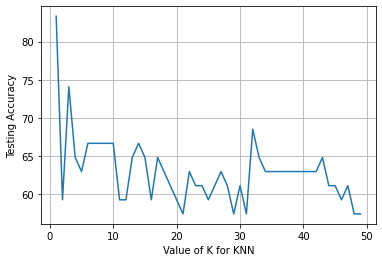

In [35]:
plt.plot(k_range,acc_list)
plt.grid()
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

##### TO find K in KNN we need to see the accuracy and stabilty. Hence, we can see between 33 to 43 that graph is stable .so, we take in between the value of k and finalize the m0del

### SVM

In [36]:
svc=SVC() 

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

tab1=confusion_matrix(pred_svc,y_test)

tab1

array([[12,  2,  0],
       [ 2, 17, 20],
       [ 0,  0,  1]], dtype=int64)

In [37]:
SVM1=tab1.diagonal().sum()/tab1.sum() # It tells us the accuracy of the Model
SVM1

0.5555555555555556

In [38]:
# Using Linear Kernel
svc=SVC(kernel='linear') 


svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

tab1=confusion_matrix(pred_svc,y_test)

tab1

array([[14,  2,  0],
       [ 0, 16,  1],
       [ 0,  1, 20]], dtype=int64)

In [39]:
SVM2=tab1.diagonal().sum()/tab1.sum() # It tells us the accuracy of the Model
SVM2

0.9259259259259259

In [40]:
# Using Sigmoid kernel
svc=SVC(kernel='sigmoid')


svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

tab1=confusion_matrix(pred_svc,y_test)

tab1

array([[ 2, 12, 21],
       [12,  7,  0],
       [ 0,  0,  0]], dtype=int64)

In [41]:
SVM3= tab1.diagonal().sum()/tab1.sum() # It tells us the accuracy of the Model
SVM3

0.16666666666666666

In [42]:
# Using Polynomial 
svc=SVC(kernel='poly') 


svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

tab1=confusion_matrix(pred_svc,y_test)

tab1

array([[12,  2,  0],
       [ 0, 17, 19],
       [ 2,  0,  2]], dtype=int64)

In [43]:
SVM4=tab1.diagonal().sum()/tab1.sum() # It tells us the accuracy of the Model
SVM4

0.5740740740740741

In [44]:
# Changing the Polynomial with degree=2

svc=SVC(kernel='poly',degree=2)

svc.fit(x_train,y_train)

pred_svc=svc.predict(x_test)

tab1=confusion_matrix(pred_svc,y_test)

tab1

array([[12,  2,  0],
       [ 0, 17, 20],
       [ 2,  0,  1]], dtype=int64)

In [45]:
SVM5= tab1.diagonal().sum()/tab1.sum() # It tells us the accuracy of the Model
SVM5

0.5555555555555556

### Let's do Grid Search to get the best kernal for our model 

In [64]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf','linear']}

gridsearch = GridSearchCV(SVC(),param_grid=param_grid,refit=True, verbose=2,n_jobs=1)
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

GridSearchCV(estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [71]:
svcclassifier_ = SVC(C=10,gamma=0.1,kernel='linear')

svcclassifier_.fit(x_train,y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [72]:
pred_svc=svcclassifier_.predict(x_test)

tab1=confusion_matrix(pred_svc,y_test)

tab1

array([[14,  2,  0],
       [ 0, 16,  1],
       [ 0,  1, 20]], dtype=int64)

In [73]:
SVM6= tab1.diagonal().sum()/tab1.sum() # It tells us the accuracy of the Model
SVM6

0.9259259259259259

### NAIVE BAYES

In [46]:
nb=MultinomialNB()

In [47]:
nb.fit(x_train,y_train)

MultinomialNB()

In [48]:
pred_nb=nb.predict(x_test)
pred_nb

array([3, 3, 1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 2, 1, 2, 1,
       2, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3,
       1, 3, 3, 2, 2, 1, 1, 2, 1, 3], dtype=int64)

In [49]:
tab2=confusion_matrix(y_test,pred_nb)
tab2

array([[12,  1,  1],
       [ 1, 15,  3],
       [ 0,  6, 15]], dtype=int64)

In [50]:
Naive_bayes=tab2.diagonal().sum()/tab2.sum() # It tells us the accuracy of the Model
Naive_bayes

0.7777777777777778

### Step 6: Implementing the results

As we know that,SVM is less computationally demanding than kNN and is easier to interpret but can identify only a limited set of patterns. On the other hand, kNN can find very complex patterns but its output is more challenging to interpret.

In [74]:
print("KNN Accuracy :",KNN)
print("SVM Accuracy :",SVM1)
print("SVM Linaer Accuracy :",SVM2)
print("SVM Sigmoid Accuracy :",SVM3)
print("SVM Ploynomial Accuracy :",SVM4)
print("SVM Polynomial degree=2 Accuracy :",SVM5)
print("SVM hypertuning Accuracy :",SVM6)
print("NAIVE BAYES Accuracy :",Naive_bayes)

KNN Accuracy : 0.5925925925925926
SVM Accuracy : 0.5555555555555556
SVM Linaer Accuracy : 0.9259259259259259
SVM Sigmoid Accuracy : 0.16666666666666666
SVM Ploynomial Accuracy : 0.5740740740740741
SVM Polynomial degree=2 Accuracy : 0.5555555555555556
SVM hypertuning Accuracy : 0.9259259259259259
NAIVE BAYES Accuracy : 0.7777777777777778


### <font color="green">From the above result we come to know that SVM Linear kernel giving us the 92% accuracy as compare to others model.</font>